In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# train_data_filepath = "/mnt/c/Users/JPhillips/ldz/data/fake_lagged/train.csv"
train_data_filepath = "/mnt/c/Users/JPhillips/ldz/data/processed/train.csv"
train_df = pd.read_csv(train_data_filepath)
train_df.head()

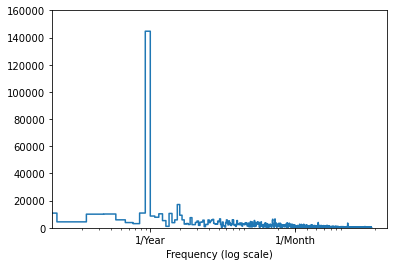

In [22]:
col = "demand"
df = train_df

fft = tf.signal.rfft(df[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_days = len(df[col])
days_per_year = 365.2524
years_per_dataset = n_samples_days/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale("log")
plt.ylim(0, 160000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524/12.0], labels=["1/Year", "1/Month"])
_ = plt.xlabel("Frequency (log scale)")